# Data Visualization

In [1]:
from models import SimpleCNN
from keras.models import load_model, Model
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
cnn = SimpleCNN(input_shape=(700, 1))
cnn.model.get_layer(index=5)

In [3]:
data = loadmat('./dataset/corn/corn_mositure_split.mat')
x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=12, shuffle=True)
x_train, x_val, x_test = x_train[:, np.newaxis, :], x_val[:, np.newaxis, :], x_test[:, np.newaxis, :]


In [4]:
print(x_train.shape)
x_train = x_train.transpose(0, 2, 1)
x_val = x_val.transpose(0, 2, 1)
# cnn.fit(x=x_train, y=y_train, x_val=x_val, y_val=y_val, epoch=200, batch_size=20000)

(39, 1, 700)


In [5]:
test_data = x_train[0, ...]
test_data = test_data[np.newaxis, ...]
print(test_data.shape)

(1, 700, 1)


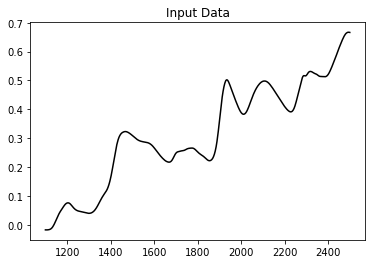

In [6]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots()
axs.plot(np.linspace(1100, 2498, 700), test_data[0, ...], c="black")
axs.set_title("Input Data")
plt.savefig("assets/input.png")
plt.show()

In [7]:
conv1 = Model(inputs=cnn.model.input, outputs=cnn.model.get_layer(index=3).output)
conv1_output = conv1.predict(test_data)

2022-06-03 16:02:38.232092: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


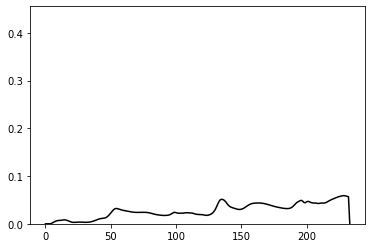

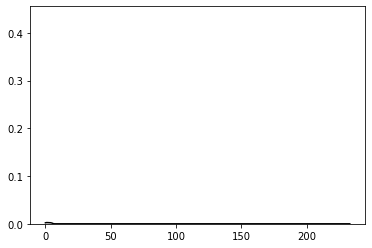

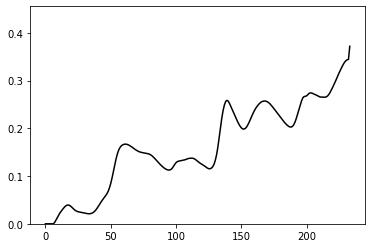

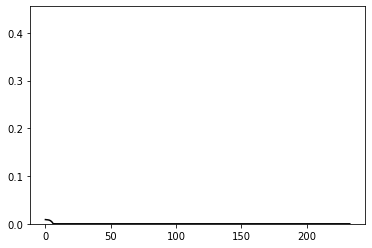

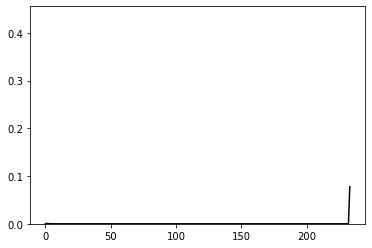

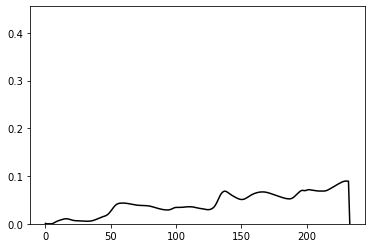

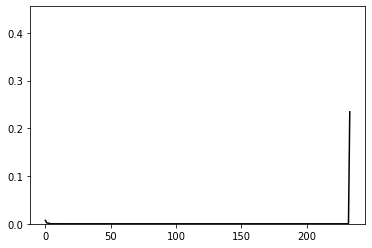

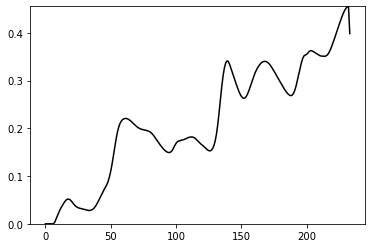

In [8]:

for i in range(conv1_output.shape[-1]):
    plt.plot(conv1_output[0, :, i], color="black")
    plt.ylim(conv1_output.min(), conv1_output.max())
    plt.savefig(f"assets/conv1/{i}.png")
    plt.show()


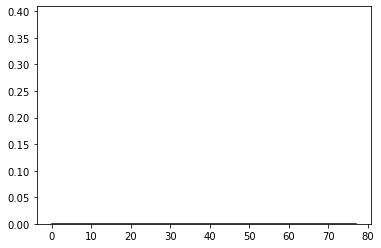

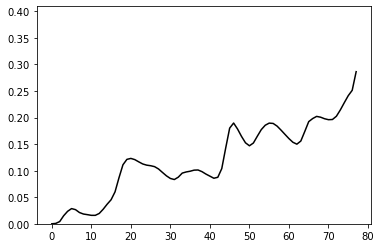

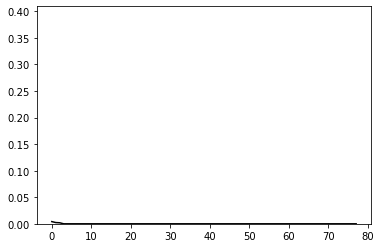

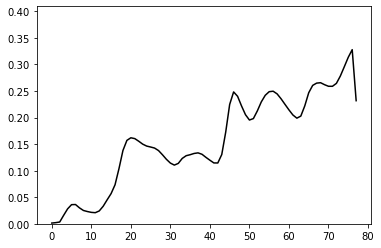

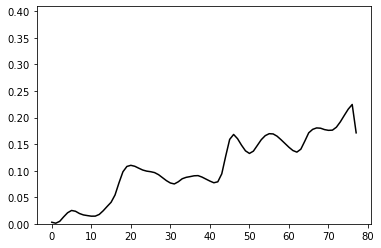

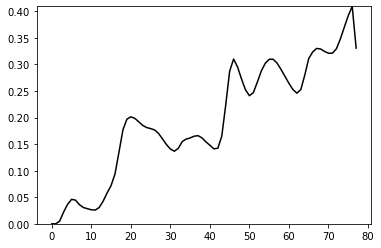

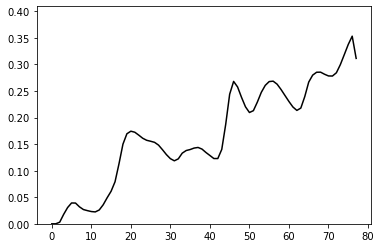

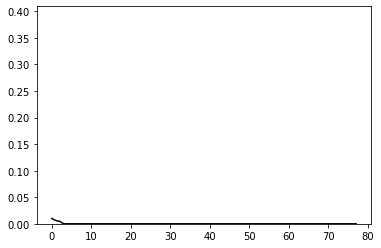

In [9]:
conv2 = Model(inputs=cnn.model.get_layer(index=3).input, outputs=cnn.model.get_layer(index=6).output)
conv2_output = conv2.predict(conv1_output)
for i in range(conv2_output.shape[-1]):
    plt.plot(conv2_output[0, :, i], c='black')
    plt.ylim(conv2_output.min(), conv2_output.max())
    plt.savefig(f"assets/conv2/{i}.png")
    plt.show()

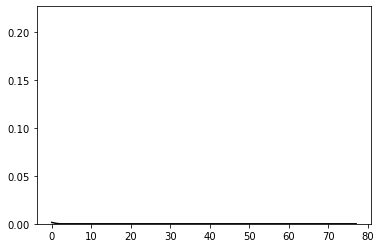

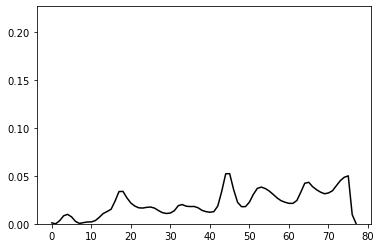

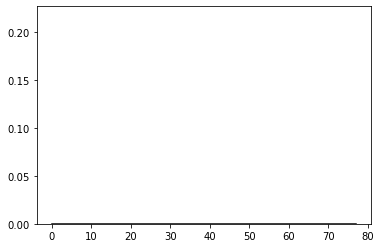

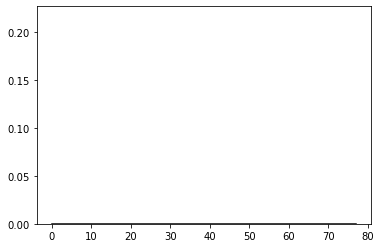

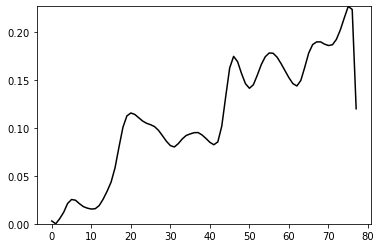

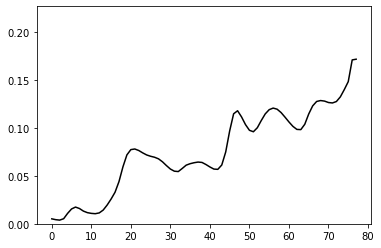

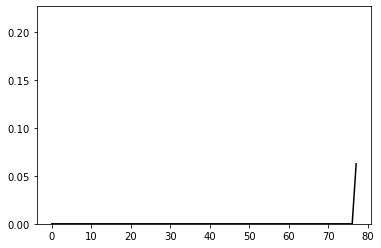

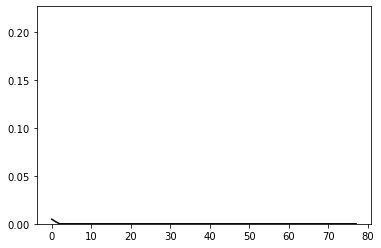

In [10]:
conv3 = Model(inputs=cnn.model.get_layer(index=6).input, outputs=cnn.model.get_layer(index=9).output)
conv3_output = conv3.predict(conv2_output)
for i in range(conv3_output.shape[-1]):
    plt.plot(conv3_output[0, :, i], c='black')
    plt.ylim(conv3_output.min(), conv3_output.max())
    plt.savefig(f"assets/conv3/{i}.png")
    plt.show()

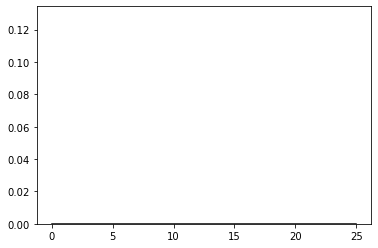

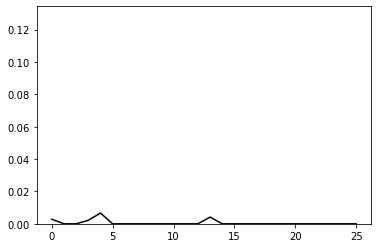

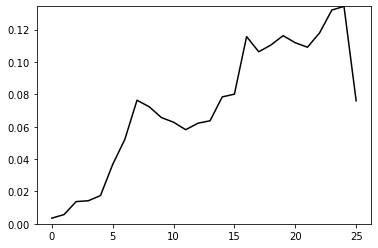

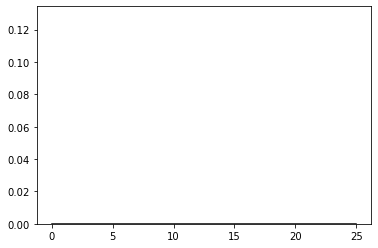

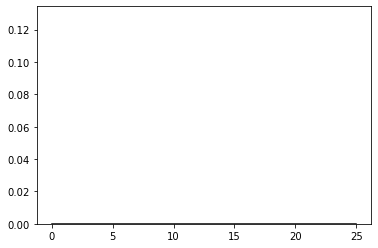

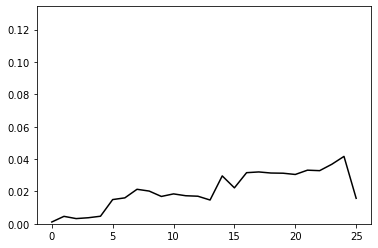

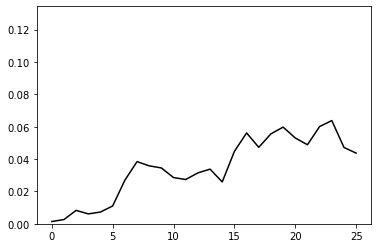

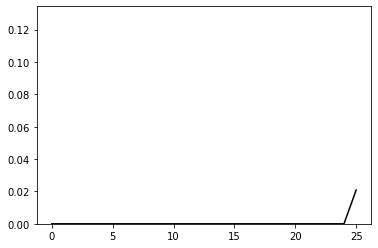

In [11]:
conv4 = Model(inputs=cnn.model.get_layer(index=9).input, outputs=cnn.model.get_layer(index=12).output)
conv4_output = conv4.predict(conv3_output)
for i in range(conv4_output.shape[-1]):
    plt.plot(conv4_output[0, :, i], c='black')
    plt.ylim(conv4_output.min(), conv4_output.max())
    plt.savefig(f"assets/conv4/{i}.png")
    plt.show()